In [169]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pandas as pd

In [304]:
def base_N_hamming_distance(i: int, j: int, N: int) -> int:
    arr_i = np.array([int(s) for s in bin(i)[2:].zfill(N)])
    arr_j = np.array([int(s) for s in bin(j)[2:].zfill(N)])
    return int(np.sum(arr_i != arr_j))

def overlap_distribution_fair_from_hd_list(hd_list,degeneracy, N) -> np.ndarray:
    overlap_dist = np.zeros(N + 1)
    overlap_dist[-1] = 1 * degeneracy / degeneracy**2
    for hd in hd_list:
        overlap_dist[-hd - 1] += 2 / (degeneracy**2)
    return overlap_dist



def random_large_N_hamming_matrix(N: int):
    

    overlap = random.randint(0,N - 1)

    hd_1 = random.randint(overlap, (N+overlap)//2)

    hd_2 = N + overlap - hd_1

    hd_3 = hd_1 + hd_2 - 2*overlap

    # print(overlap)

    return  [hd_1, hd_2, hd_3]


# [50, 20, 30] N = 50
# N = h1 + h2 - overlap
# h1 + h2 = N + overlap
# h1 -> (1,(N+overlap)/2) for h2 >= h1
# 

    

def flip_spins(initial_state:int, spins_to_flip:list) -> int:
    flipped_state = initial_state
    for spin in spins_to_flip:
        flipped_state ^= (2**spin)
    return flipped_state

    

In [281]:
od_var_list = []
N_list = []
system_size = 50
for N in range(10,system_size):

    od_var_list_i = []
    for i in range(1000):

        hd_list = random_large_N_hamming_matrix(N)

        od = overlap_distribution_fair_from_hd_list(hd_list,3, system_size)
        od_bins = np.array([((2 * i) / system_size) - 1 for i in range(system_size + 1)])

        od_mean = np.sum(od_bins * od)
        od_var = np.sum(od * (od_bins - od_mean) ** 2)
        od_var_list_i.append(od_var)

    N_list.append(N)
    od_var_list.append(np.mean(od_var_list_i))


    # print(hd_list)
    # print(od)
    # print(od_bins)
    # print(od_mean)
    # print(od_var)



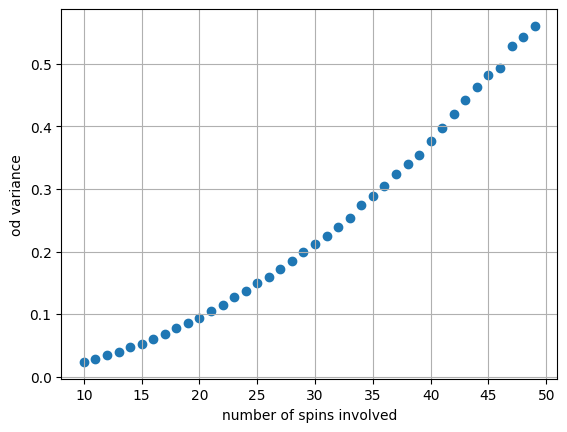

In [282]:
# Plot x vs y
plt.scatter(N_list, od_var_list, marker='o')  # Optional: add marker and line style
plt.xlabel('number of spins involved')  # Label for the x-axis
plt.ylabel('od variance')  # Label for the y-axis
plt.grid(True)  # Optional: adds grid
plt.show()  # Display the plot



[,,1/2,,, 1/2]


In [260]:
N = 100
M = 2**N
num_samples = 100
degen_range = [3,10]


data_list = []

for degeneracy in range(degen_range[0], degen_range[1]):
    for _ in range(num_samples):



        gs_array = set()
        while len(gs_array) < degeneracy:
            gs_array.add(random.randint(0,M - 1))
        gs_array = list(gs_array)



        
        hd_array = []
        spins_involved = 0
        for gs_i in range(degeneracy):
            for gs_j in range(gs_i + 1,degeneracy):
                binary_diff = gs_array[gs_i]^gs_array[gs_j]
                hd_array.append(binary_diff.bit_count())
                spins_involved |= binary_diff

        od = overlap_distribution_fair_from_hd_list(hd_array,degeneracy, N)
        od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
        od_mean = np.sum(od_bins * od)
        od_var = np.sum(od * (od_bins - od_mean) ** 2)


        data_list.append([spins_involved.bit_count(), od_var, degeneracy])



data_list = data_list
        


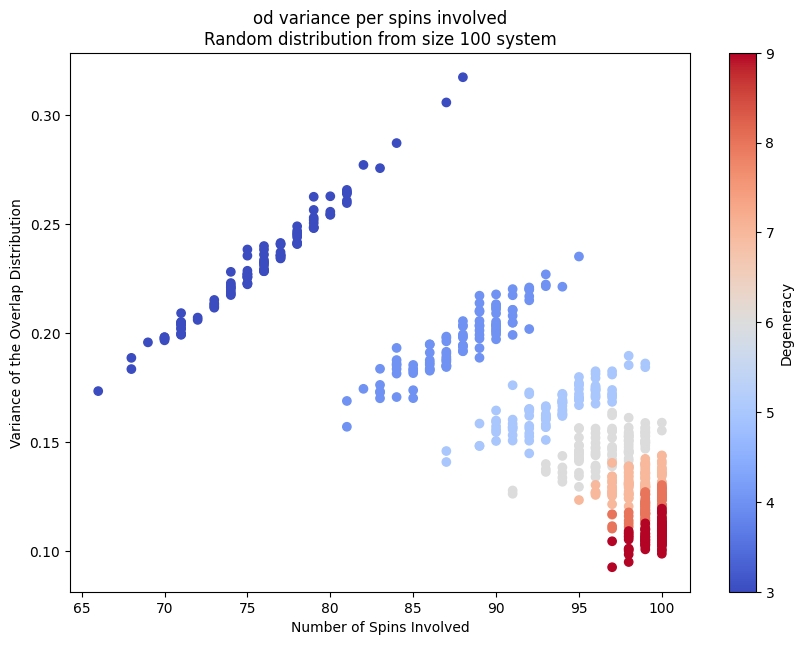

In [268]:
plot_data = np.array(data_list).T

spins_involved = plot_data[0]
od_vars = plot_data[1]
degeneracies = plot_data[2]


cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)
plt.figure(figsize=(10,7))

plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)

plt.xlabel("Number of Spins Involved")
plt.ylabel("Variance of the Overlap Distribution")
plt.title(f"od variance per spins involved\nRandom distribution from size {N} system")

plt.colorbar(label='Degeneracy')


plt.show()


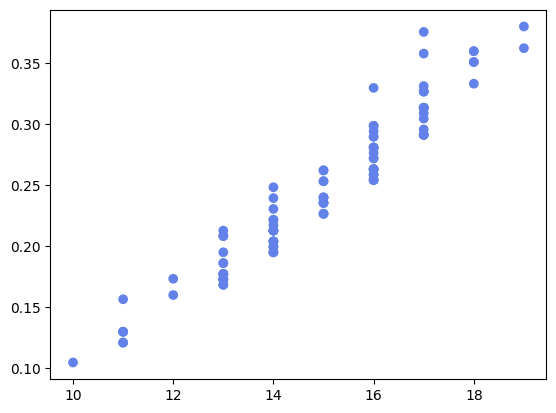

In [162]:
chosen_degeneracy = 3

plot_data = np.array([d for d in data_list if d[2] == chosen_degeneracy]).T

spins_involved = plot_data[0]
od_vars = plot_data[1]
degeneracies = plot_data[2]


cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)


      si       odv  deg
0     77  0.235002    3
1     80  0.253965    3
2     70  0.195240    3
3     70  0.201462    3
4     78  0.242667    3
...   ..       ...  ...
9995  73  0.211299    3
9996  70  0.201462    3
9997  81  0.259378    3
9998  75  0.232356    3
9999  79  0.254440    3

[10000 rows x 3 columns]


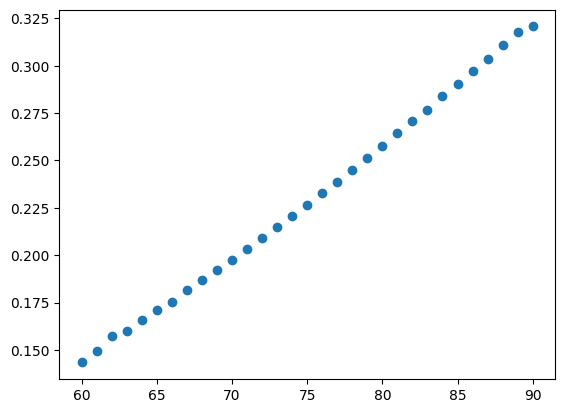

In [185]:


df = pd.DataFrame(data_list, columns=['si', 'odv', 'deg'])

plot_df = df[df['deg'] == 3].groupby('si')['odv'].mean().reset_index()

plt.scatter(x=plot_df['si'], y =plot_df['odv'])



# print(avg_y_per_x)


# plot_data = np.array(data_list).T

# spins_involved = plot_data[0]
# od_vars = plot_data[1]
# degeneracies = plot_data[2]


# cmap = plt.cm.coolwarm
# norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


# plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)


plt.show()



In [182]:
od_var_list = []
N_list = []
system_size = 100
for N in range(20,system_size):

    for i in range(100):

        hd_list = random_large_N_hamming_matrix(N)

        od = overlap_distribution_fair_from_hd_list(hd_list,3, system_size)
        od_bins = np.array([((2 * i) / system_size) - 1 for i in range(system_size + 1)])

        od_mean = np.sum(od_bins * od)
        od_var = np.sum(od * (od_bins - od_mean) ** 2)

        N_list.append(N)
        od_var_list.append(od_var)





    # print(hd_list)
    # print(od)
    # print(od_bins)
    # print(od_mean)
    # print(od_var)


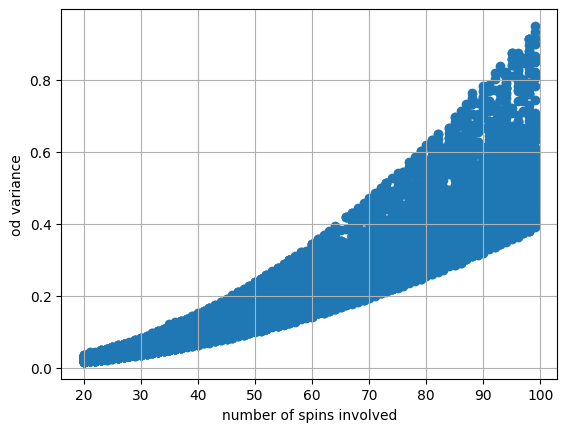

In [183]:
# Plot x vs y
plt.scatter(N_list, od_var_list, marker='o')  # Optional: add marker and line style
plt.xlabel('number of spins involved')  # Label for the x-axis
plt.ylabel('od variance')  # Label for the y-axis
plt.grid(True)  # Optional: adds grid
plt.show()  # Display the plot

In [342]:
# Forced even distribution

N = 50
M = 2**N
num_samples = 100
degen_range = [2,20]


data_list = []

for degeneracy in range(degen_range[0], degen_range[1]):
    for max_hd in range(int(np.ceil(np.log2(degeneracy))),N):
        for _ in range(num_samples):


            # gs_array = set()

            # gs_array.add(0)
            # next_gs_list = list(bin(0)[2:].zfill(N))
            # for i in range(max_hd):
            #     next_gs_list[i] = '0' if next_gs_list[i] == '1' else '1'
            # next_gs = int("".join(next_gs_list), 2)
            # gs_array.add(next_gs)
            # last_gs = next_gs

            # while len(gs_array) < degeneracy:
            #     next_gs_list = list(bin(last_gs)[2:].zfill(N))
            #     for _ in range(max_hd):
            #         i = random.randint(0,N-1)
            #         next_gs_list[i] = '0' if next_gs_list[i] == '1' else '1'
            #     next_gs = int("".join(next_gs_list), 2)
            #     gs_array.add(next_gs)
            #     last_gs = next_gs
            # gs_array = list(gs_array)


            # GHZ
            # |00000000> ---- |11110000>
            # |01010000>

            # try:

            gs_array = [0,(2**max_hd) - 1]

            gs_array += random.sample(range(1,(2**max_hd) - 1),degeneracy - 2)
            # except Exception as e:
            #     print("mhd", max_hd)
            #     print("deg", degeneracy)
            #     print(e)
            #     raise Exception


            # gs_set = set()

            # ghz_spins = random.sample(range(0,N-1), max_hd)

            # first_state = random.randint(0,2**N)
            # second_state = flip_spins(first_state,ghz_spins)


            # in_between_states = random.sample(range(0,max_hd),degeneracy-2)



            # gs_set.add()







            # W state - flip random i, j then flip j, random k so on... 



            
            hd_array = []
            spins_involved = 0
            for gs_i in range(degeneracy):
                for gs_j in range(gs_i + 1,degeneracy):
                    binary_diff = gs_array[gs_i]^gs_array[gs_j]
                    hd_array.append(binary_diff.bit_count())
                    spins_involved |= binary_diff

            od = overlap_distribution_fair_from_hd_list(hd_array,degeneracy, N)
            od_bins = np.array([((2 * i) / N) - 1 for i in range(N + 1)])
            od_mean = np.sum(od_bins * od)
            od_var = np.sum(od * (od_bins - od_mean) ** 2)


            data_list.append([spins_involved.bit_count(), od_var, degeneracy])



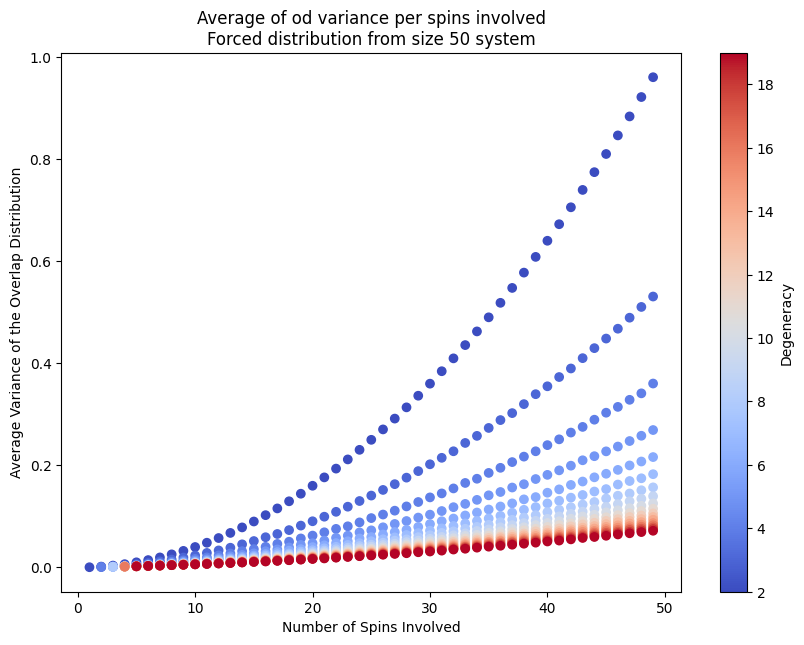

In [343]:
plot_data = np.array(data_list).T

spins_involved = plot_data[0]
od_vars = plot_data[1]
degeneracies = plot_data[2]


cmap = plt.cm.coolwarm
norm = Normalize(vmin=degen_range[0], vmax=degen_range[1] - 1)


# plt.scatter(spins_involved, od_vars, c=degeneracies, cmap=cmap, norm=norm)

df = pd.DataFrame(data_list, columns=['si', 'odv', 'deg'])

plot_df = df.groupby(['si','deg'])['odv'].mean().reset_index()


plt.figure(figsize=(10,7))
plt.scatter(x=plot_df['si'], y =plot_df['odv'], c=plot_df["deg"], cmap=cmap, norm=norm)



plt.xlabel("Number of Spins Involved")
plt.ylabel("Average Variance of the Overlap Distribution")
plt.title(f"Average of od variance per spins involved\nForced distribution from size {N} system")

plt.colorbar(label='Degeneracy')

plt.show()

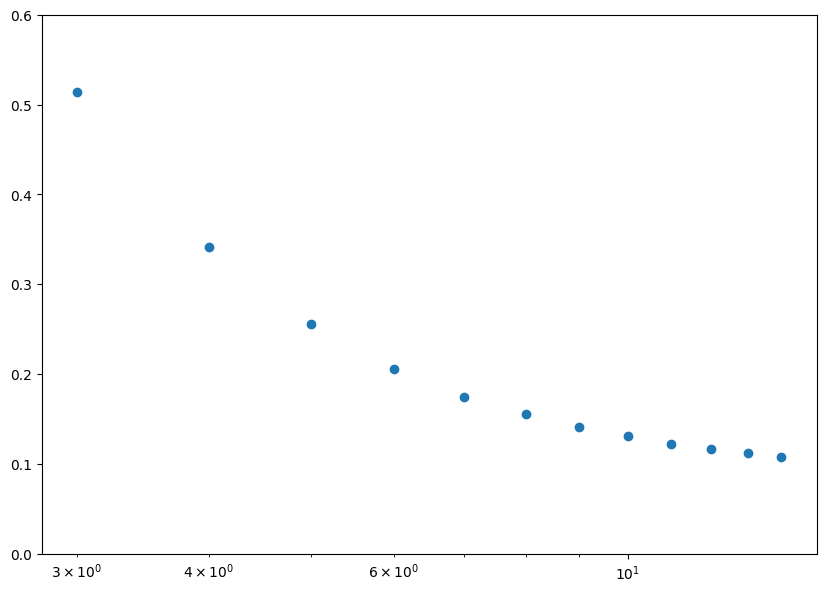

In [303]:
plot_df_1 = df.loc[df["si"] == N].groupby(['si','deg'])['odv'].mean().reset_index()

plt.figure(figsize=(10,7))
plt.scatter(x=plot_df_1['deg'], y =plot_df_1['odv'])
plt.ylim(0,0.6)
plt.xscale("log")


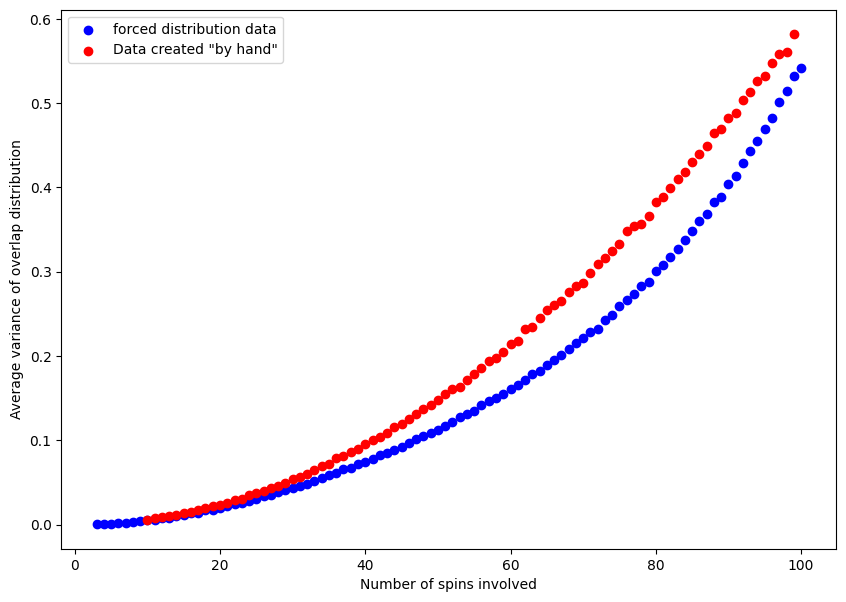

In [274]:
df = pd.DataFrame(data_list, columns=['si', 'odv', 'deg'])

plot_df = df[df['deg'] == 3].groupby('si')['odv'].mean().reset_index()


plt.figure(figsize=(10,7))
plt.scatter(x=plot_df['si'], y =plot_df['odv'], color='blue', label="forced distribution data")
plt.scatter(N_list, od_var_list, color = 'red', label='Data created "by hand"')

plt.xlabel("Number of spins involved")
plt.ylabel("Average variance of overlap distribution")

plt.legend()


plt.show()

In [317]:
print(bin(7))
print(bin(2**3))

bin(7 ^ (2**0))

print(bin(flip_spins(7,[1,2,3])))

0b111
0b1000
0b1001


In [327]:
gs_array1 = [0,2**(4) - 1]

gs_array1 += random.sample(range(1,2**(4) - 1),14 - 2)

gs_array1

[0, 15, 4, 8, 1, 10, 14, 13, 7, 9, 6, 2, 12, 11]